# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
names = df[["country"]].copy()
X = df.drop("country", axis = 1)

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [6]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [7]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

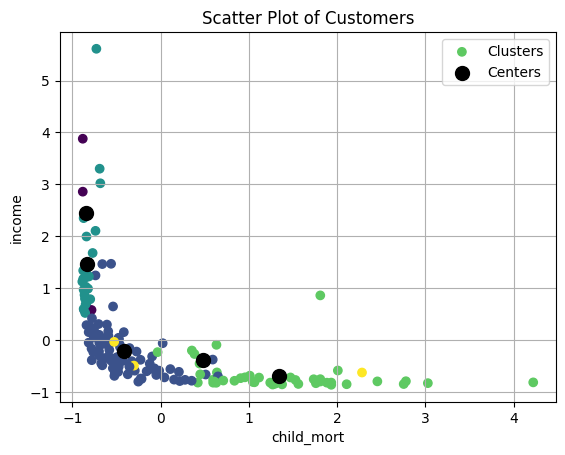

In [8]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [9]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [10]:
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range (1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

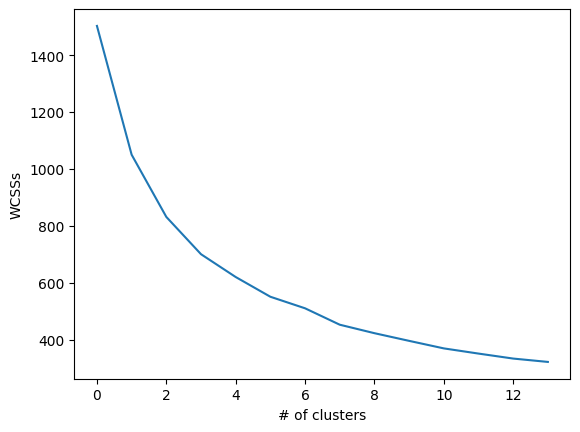

In [11]:
plt.plot(WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSSs")
plt.show()

From the above plot of the WCSS values, there is no obvious elbow point in which the WCSS decreases negligibly with an increased number of clusters. As we are labelling countries, we can expect there to be 2 major clusters: developed and developing countries. As the WCSS of 2 clusters is 800 and we can improve this to 600 by adding 2 more clusters, we will fit a model with 4 clusters. Economically, we can expect the 4 clusters to be the developed and developing economies further segmented by other macroeconomic indicators, such as exports or inflation.

In [12]:
kmeans = KMeans(n_clusters = 4, n_init = 30).fit(X_scaled)

In [13]:
preds = pd.DataFrame(kmeans.labels_)

# 6.) Do the same for a silhoutte plot

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
SSs = []
Ks = range(2,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    SSs.append(sil)


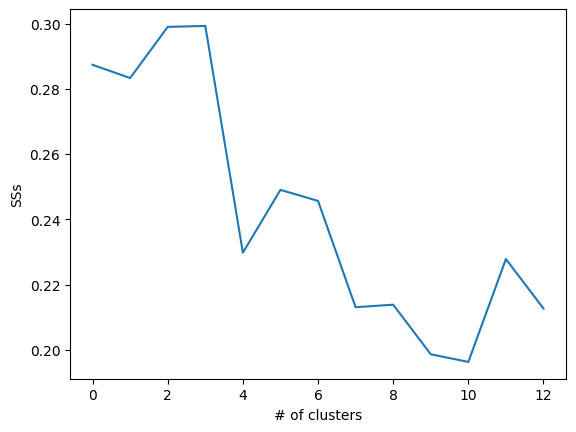

In [16]:
plt.plot(SSs)
plt.xlabel("# of clusters")
plt.ylabel("SSs")
plt.show()

From the silhouette plot, 4 seems to be a good number of clusters to choose as it is a local minimum for SS values.

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [17]:
output = pd.concat([preds, df], axis = 1)

In [18]:
output.head()

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,2,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,2,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
print("Cluster 1 : ")
list(output.loc[output[0] == 0, 'country'])

Cluster 1 : 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'S

In [20]:
print(f"Cluster 2 : ")
list(output.loc[output[0] == 1, 'country'])

Cluster 2 : 


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [21]:
print(f"Cluster 3 : ")
list(output.loc[output[0] == 2, 'country'])

Cluster 3 : 


['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [22]:
print(f"Cluster 4 : ")
list(output.loc[output[0] == 3, 'country'])

Cluster 4 : 


['Luxembourg', 'Malta', 'Singapore']

In [23]:
#### Write an observation

Cluster 1 comprises mainly middle income developing economies.

Cluster 2 comprises mainly developed economies.  

Cluster 3 comprises mainly low income developing economies.  

Cluster 4 is the smallest cluster of only 3 countries, which are all small developed economies.  

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [24]:
output.drop("country", axis = 1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,21.743182,41.316920,6.259318,48.075749,12972.386364,7.430580,72.755682,2.293295,6912.636364
1,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
2,93.841304,28.837174,6.346957,42.128261,3738.978261,12.087065,59.232609,5.054348,1826.130435
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [25]:
output.drop("country", axis = 1).groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,14.136313,19.412163,2.157549,19.970637,8819.321004,7.764821,4.272361,0.695263,5422.836621
1,2.159140,21.736255,3.266299,17.455134,19785.308900,4.266366,1.440231,0.369293,15040.114942
2,33.188663,18.231737,2.675974,17.877592,5527.110061,15.674386,6.507126,1.002871,2913.353765
3,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084


# 9.) Write an observation about the descriptive statistics.

The main difference between the clusters seem to be the income and gdpp, with cluster 4 having the highest income and gdpp, followed by cluster 2, cluster 1 and cluster 3 with the lowest. Cluster 4 has the highest average imports and exports by a large margin. Clusters 1 to 3 have roughly the same average imports, with cluster 3 having slightly lower average exports than clusters 1 and 2. Clusters 2 and 4 have the highest average life expectancy, while cluster 3 has the highest inflation and child mortality. In general, cluster 1 falls between clusters 2 and 3 for most statistics. These results are consistent with our earlier observation that clusters 2 and 4 are developed economies while clusters 1 and 3 are developing economies, with countries in cluster 1 being higher advanced than those in cluster 3 in general.  

With regards to standard deviation, clusters 2 and 4 have the highest standard deviation for income and gdpp, highlighting that the income disparity between the developed economies is larger than the developing ones. In contrast, child mortality, inflation and life expectancy have a larger standard deviation in clusters 1 and 3, suggesting that the disparity for these developmental indicators is larger in the developing economies. The standard deviation for exports, health and imports are quite close among all 4 clusters.